In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib
import plotly.express as px
import seaborn as sns
#Note, if using jupyter lab, install the plotly extension for jupyter lab
#conda install -c conda-forge jupyterlab-plotly-extension


In [2]:
#Pandas set max columns so you can see everything!
pd.set_option('display.max_columns', None)
#OR
pd.set_option('max_columns', 100)

## Begin by getting a general feel for the data set
- Use .head() to peak at all the columns
- Use .describe() to get basic stats.  Note 50% is also the median
- Use .info() to data types
- use .shape() to get rows and columns
- use .value_counts() to get see a count of categorical values in a column
- separate numerical and categorical data 
- Check missing data


In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.shape

(1460, 81)

In [35]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [21]:
#Separate numeric and object data types
numeric_values = df_train.columns[df_train.dtypes != 'object']
categorical_values = df_train.columns[df_train.dtypes == 'object']
print(numeric_values)
print(categorical_values)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

In [32]:
#Get a count of missing values using the sum of the isnull function
df_train[numeric_values].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [30]:
#Get the length of the data frame
len(df_train)

1460

In [33]:
#Calculate the percentage of missing data
df_train[numeric_values].isnull().sum().sort_values(ascending=False)/len(df_train)

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
BsmtFinSF1       0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
TotalBsmtSF      0.000000
BsmtUnfSF        0.000000
BsmtFinSF2       0.000000
SalePrice        0.000000
BsmtFullBath     0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
MSSubClass       0.000000
GrLivArea        0.000000
BsmtHalfBath     0.000000
YrSold           0.000000
FullBath         0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
Id               0.000000
dtype: float

In [8]:
df_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

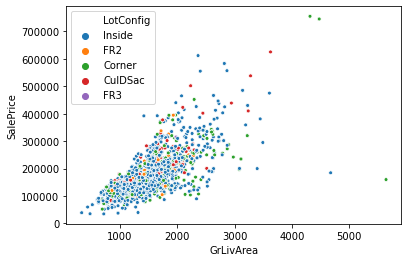

In [14]:
#use the hue parameter to add in object type variables to see how they relate
sns.scatterplot(x="GrLivArea", y="SalePrice", hue='LotConfig', s=15, data=df_train);

In [ ]:
#Handy to check histograms side by side (log vs no log)
#https://www.kaggle.com/apapiu/regularized-linear-models
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

In [ ]:
#adding () to describe gives statistical values (without the parentheses you don't get the stats...just a list of values)
df_train['SalePrice'].describe()

In [ ]:
#import plotly.express as px
#df = px.data.tips()
fig = px.histogram(df_train, x="SalePrice")
fig.show()


In [ ]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

In [ ]:
fig = px.histogram(df_train, x="SalePrice")
fig.show()

In [ ]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

In [ ]:
fig = px.histogram(df_train, x="GrLivArea")
fig.show()

In [ ]:
#call get_dummies to convert categorical variables to numeric
df_train = pd.get_dummies(df_train)
df_train = df_train.fillna(df_train.mean())

In [ ]:
df_train = df_train.fillna(df_train.mean())

In [ ]:
#install plotly from command line
#conda install -c plotly plotly_express

In [ ]:
#Large positive skew
#Check the skew on SalePrice
df_train['SalePrice'].skew()

In [ ]:
#Peakedness
#Check Kurtosis on SalePrice
#Kurtosis of 3 is normal distribution
df_train['SalePrice'].kurtosis()

In [ ]:
df_train.describe()



In [ ]:
df_train.info()

In [ ]:
#GrLivArea: Above grade (ground) living area square feet
df_train['GrLivArea'].describe()

In [ ]:
#Skewness and Kurtosis
#
#https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85
#Kurtosis can be indicative of outliers
import plotly.express as px
#df = px.data.tips()
fig = px.histogram(df_train, x="GrLivArea")
fig.show()

In [ ]:
#Strong linear relationship between living area and saleprice
fig = px.scatter(df_train, x='GrLivArea', y='SalePrice')
fig.show()

In [ ]:
fig = px.histogram(df_train, x="TotalBsmtSF")
fig.show()

In [ ]:
df_train['TotalBsmtSF'].skew()

In [ ]:
#seems that you can use .kurt or .kurtosis
df_train['TotalBsmtSF'].kurtosis()

In [ ]:
#Correlation matrix
#box plot for categoricals


In [ ]:
fig = px.box(df_train, x='YearBuilt', y='SalePrice')
fig.show()

In [ ]:
#OverallQual OverallCond
fig = px.box(df_train, x='OverallQual', y='SalePrice')
fig.show()

In [ ]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BldgType", s=15, data=df_train);

In [ ]:
df_train.head(5)

In [ ]:
corrmatrix = df_train.corr()

In [ ]:
corrmatrix


In [ ]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corrmatrix = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF','FullBath', 'YearBuilt']]
y = df_train['SalePrice']

In [ ]:
x.info()

In [ ]:
y.describe()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 10)

In [ ]:
model = LinearRegression().fit(x_train, y_train)


In [ ]:
y_train

In [ ]:
accuracy = model.score(x_test, y_test)

In [ ]:
accuracy

In [ ]:
df_test = pd.read_csv("data/test.csv")

In [ ]:
df_test['GrLivArea']

In [ ]:
df_test = df_test[['Id','OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF','FullBath', 'YearBuilt']]

In [ ]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

numeric_feats = df_test.dtypes[df_test.dtypes != "object"].index

skewed_feats = df_test[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_test[skewed_feats] = np.log1p(df_test[skewed_feats])

In [ ]:
df_test.head(5)

In [ ]:
#Python Replace a missing value NA with 0
#https://datatofish.com/replace-nan-values-with-zeros/

In [ ]:
#call get_dummies to convert categorical variables to numeric
df_test = pd.get_dummies(df_test)
df_test = df_test.fillna(df_test.mean())

In [ ]:
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)

In [ ]:

df_test.describe()

In [ ]:
df_test['GarageArea']

In [ ]:
df_test = df_test.dropna()

In [ ]:
x_test = df_test[['OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF','FullBath', 'YearBuilt']]

In [ ]:
x_test = x_test.dropna()

In [ ]:
x_test.describe()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = np.expm1(y_pred)
y_pred

In [ ]:
##Write results out to csv for kaggle
submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": y_pred
})

submission.to_csv("kaggle.csv", index = False)

In [ ]:
back = np.expm1(11.71772456)
back
